In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Corpus/stemmed_dict_28.07.2020.15h.csv') #dictionaries
df.columns = ['original_text', 'label', 'dictionaries_words_stem']
df

,original_text,label,dictionaries_words_stem
0,лива туввар сирия аллажатта islamstateқа қарсы...,1,лива ту сирия алла islamstateқа қар ұрыс бас
1,террористік иттер бүлікшілерге айналады turke...,1,тер ит бүлік айнала turkey pkk twitterkurds ht...
2,әлхайрдың газваты арнайы аймақ олардан кейін о...,1,әл газваты арнайы аймақ олар кейін олар ал қай...
3,сириядағы ресей n басып кіру туралы алаңдамауд...,1,сирия ресей n бас кір туралы алаң кір мүмкін е...
4,ядролық соғыс соғысы келе жатыр,1,ядролық соғыс соғыс кел жатыр
...,...,...,...
29331,періште көпше араб малайкат жекеше араб малайк...,0,періште көп ара малай жеке ара малай алла таға...
29332,иманның алты шартының ең әуелгісі алла тағалағ...,0,иман алты шарт ең әуелгі алла таға иман ақыл б...
29333,"иман иман араб сенім сену, илану, қабылдау алл...",0,иман иман ара сенім сен илану қабылда алла тағ...
29334,ассабуур аса сабырлы club qissa angimeler,0,ас аса сабырлы club qissa angimeler


In [7]:
df['28k_words_stem'] = pd.read_csv('Corpus/stemmed_28k_28.07.2020.15h.csv')['stemmed'] #28r words_
df

,original_text,label,dictionaries_words_stem,28k_words_stem
0,лива туввар сирия аллажатта islamstateқа қарсы...,1,лива ту сирия алла islamstateқа қар ұрыс бас,ли ту сирия алла is қарс ұрыс баст
1,террористік иттер бүлікшілерге айналады turke...,1,тер ит бүлік айнала turkey pkk twitterkurds ht...,терр итте бүлі айна turk pkk twitterkurds http t
2,әлхайрдың газваты арнайы аймақ олардан кейін о...,1,әл газваты арнайы аймақ олар кейін олар ал қай...,әлха газ арна ай олар кей олар ал қайт орал
3,сириядағы ресей n басып кіру туралы алаңдамауд...,1,сирия ресей n бас кір туралы алаң кір мүмкін е...,сирия ресей n басы кіру тура алаң кіру мүмк ем...
4,ядролық соғыс соғысы келе жатыр,1,ядролық соғыс соғыс кел жатыр,ядро соғы соғы келе жаты
...,...,...,...,...
29331,періште көпше араб малайкат жекеше араб малайк...,0,періште көп ара малай жеке ара малай алла таға...,пері көпш араб мала жеке араб мала алла таға н...
29332,иманның алты шартының ең әуелгісі алла тағалағ...,0,иман алты шарт ең әуелгі алла таға иман ақыл б...,иман алты шарт ең әуел алла таға иман ақыл бүт...
29333,"иман иман араб сенім сену, илану, қабылдау алл...",0,иман иман ара сенім сен илану қабылда алла тағ...,иман иман араб сені сену илан қабы алла таға ө...
29334,ассабуур аса сабырлы club qissa angimeler,0,ас аса сабырлы club qissa angimeler,асса аса сабы club qissa an


In [8]:
df['golang_algo'] = pd.read_csv('Corpus/stemmed_goalgo_28.07.2020.15h.csv')['text'] #algorithms golang
df

,original_text,label,dictionaries_words_stem,28k_words_stem,golang_algo
0,лива туввар сирия аллажатта islamstateқа қарсы...,1,лива ту сирия алла islamstateқа қар ұрыс бас,ли ту сирия алла is қарс ұрыс баст,лива туввар сирия алла islamstateқа қарс ұрыс ...
1,террористік иттер бүлікшілерге айналады turke...,1,тер ит бүлік айнала turkey pkk twitterkurds ht...,терр итте бүлі айна turk pkk twitterkurds http t,терр итте бүлі айна turkey pkk twitterkurds ht...
2,әлхайрдың газваты арнайы аймақ олардан кейін о...,1,әл газваты арнайы аймақ олар кейін олар ал қай...,әлха газ арна ай олар кей олар ал қайт орал,әлха газваты арна айма олар кейі олар алеппеге...
3,сириядағы ресей n басып кіру туралы алаңдамауд...,1,сирия ресей n бас кір туралы алаң кір мүмкін е...,сирия ресей n басы кіру тура алаң кіру мүмк ем...,сирия ресей n басы кіру тура алаң кіру мүмк ем...
4,ядролық соғыс соғысы келе жатыр,1,ядролық соғыс соғыс кел жатыр,ядро соғы соғы келе жаты,ядро соғы соғы келе жаты
...,...,...,...,...,...
29331,періште көпше араб малайкат жекеше араб малайк...,0,періште көп ара малай жеке ара малай алла таға...,пері көпш араб мала жеке араб мала алла таға н...,пері көпш араб мала жеке араб мала алла таға н...
29332,иманның алты шартының ең әуелгісі алла тағалағ...,0,иман алты шарт ең әуелгі алла таға иман ақыл б...,иман алты шарт ең әуел алла таға иман ақыл бүт...,иман алты шарт ең әуел алла таға иман ақыл бүт...
29333,"иман иман араб сенім сену, илану, қабылдау алл...",0,иман иман ара сенім сен илану қабылда алла тағ...,иман иман араб сені сену илан қабы алла таға ө...,иман иман араб сені сену илан қабы алла таға ө...
29334,ассабуур аса сабырлы club qissa angimeler,0,ас аса сабырлы club qissa angimeler,асса аса сабы club qissa an,асса аса сабы club qissa angimeler


In [9]:
df['76k_words_stem'] = pd.read_csv('Corpus/stemmed_76k_28.07.2020.15h.csv')['stemmed'] #76k words_
df

,original_text,label,dictionaries_words_stem,28k_words_stem,golang_algo,76k_words_stem
0,лива туввар сирия аллажатта islamstateқа қарсы...,1,лива ту сирия алла islamstateқа қар ұрыс бас,ли ту сирия алла is қарс ұрыс баст,лива туввар сирия алла islamstateқа қарс ұрыс ...,ли ту сирия алла islamstateқа қарсы ұрыс баста
1,террористік иттер бүлікшілерге айналады turke...,1,тер ит бүлік айнала turkey pkk twitterkurds ht...,терр итте бүлі айна turk pkk twitterkurds http t,терр итте бүлі айна turkey pkk twitterkurds ht...,террор ит бүлікшіл айнала turkey pkk twitterku...
2,әлхайрдың газваты арнайы аймақ олардан кейін о...,1,әл газваты арнайы аймақ олар кейін олар ал қай...,әлха газ арна ай олар кей олар ал қайт орал,әлха газваты арна айма олар кейі олар алеппеге...,әл газ арнайы аймақ ол кейін ол ал қай орал
3,сириядағы ресей n басып кіру туралы алаңдамауд...,1,сирия ресей n бас кір туралы алаң кір мүмкін е...,сирия ресей n басы кіру тура алаң кіру мүмк ем...,сирия ресей n басы кіру тура алаң кіру мүмк ем...,сирия ресей n басы кіру туралы алаңда кіру мүм...
4,ядролық соғыс соғысы келе жатыр,1,ядролық соғыс соғыс кел жатыр,ядро соғы соғы келе жаты,ядро соғы соғы келе жаты,ядролы соғыс соғыс келе жатыр
...,...,...,...,...,...,...
29331,періште көпше араб малайкат жекеше араб малайк...,0,періште көп ара малай жеке ара малай алла таға...,пері көпш араб мала жеке араб мала алла таға н...,пері көпш араб мала жеке араб мала алла таға н...,періште көп араб малай жекеше араб малай алла ...
29332,иманның алты шартының ең әуелгісі алла тағалағ...,0,иман алты шарт ең әуелгі алла таға иман ақыл б...,иман алты шарт ең әуел алла таға иман ақыл бүт...,иман алты шарт ең әуел алла таға иман ақыл бүт...,иман алты шарт ең әуелгі алла тағала иман ақыл...
29333,"иман иман араб сенім сену, илану, қабылдау алл...",0,иман иман ара сенім сен илану қабылда алла тағ...,иман иман араб сені сену илан қабы алла таға ө...,иман иман араб сені сену илан қабы алла таға ө...,иман иман араб сенім сену илан қабылдау алла т...
29334,ассабуур аса сабырлы club qissa angimeler,0,ас аса сабырлы club qissa angimeler,асса аса сабы club qissa an,асса аса сабы club qissa angimeler,асса аса сабырлы club qissa angimeler


In [10]:
df.to_csv('stemmed_29.07.2020.last_29k.csv', index=False)

In [7]:
df[['dictionaries_words_stem', '28k_words_stem', 'golang_algo', 'label']].to_csv('stemmed_28.07.2020.last_29k.csv', index=False)

In [3]:
df = pd.read_csv('Corpus/stemmed_27.07.2020.11h.csv')
df['text'] = df['stemmed'].astype(str)
df['label'] = pd.to_numeric(df['label'])
df = df[['text', 'label']]
df

,text,label
0,лива ту сирия алла islamstateқа қар ұрыс бас,1
1,тер ит бүлік айнала turkey pkk twitterkurds ht...,1
2,әл газваты арнайы аймақ олар кейін олар ал қай...,1
3,сирия ресей n бас кір туралы алаң кір мүмкін е...,1
4,ядролық соғыс соғыс кел жатыр,1
...,...,...
77929,кеш әзір дейді қазақ түсінік алла атау құдай п...,0
77930,тәңірі түркі сөз қатар қолданыл бұл қазақы орт...,0
77931,мейірімділік сияқты ізгілік қасиет абсолютті с...,0
77932,ту да алла таға рақымдылық жайлы бір хадисте а...,0


In [4]:
df.nunique()

text     75961
label        2
dtype: int64

In [5]:
len(list(set(" ".join(df.text.tolist()).split(" "))))

46813

In [6]:
df.loc[df['label'] == 1]

,text,label
0,лива ту сирия алла islamstateқа қар ұрыс бас,1
1,тер ит бүлік айнала turkey pkk twitterkurds ht...,1
2,әл газваты арнайы аймақ олар кейін олар ал қай...,1
3,сирия ресей n бас кір туралы алаң кір мүмкін е...,1
4,ядролық соғыс соғыс кел жатыр,1
...,...,...
35040,имамдардың айт жүр өтірік екендігін анық бiлед...,1
35041,аш,1
35042,сопы да арт ашыл яғни мас шешіл ин щаа алла,1
35043,есім усуд ал абу рофик деген есім де жүр кейін...,1


In [7]:
df.loc[df['label'] == 0]

,text,label
1550,пайғамбар арт ер бұл біздің ең басты мақсат ал...,0
1551,күмән кез шоқы керек деген сияқты сөз дін шыға...,0
1552,сұрақ ас ала уа раxматуллаһи уа бар құпта нам ...,0
1553,сұрақ егер бір не үшін нам оқ керек деп сұр не...,0
1554,сұрақ ибн баз ибн усаймин ал бұлар мүшріктер м...,0
...,...,...
77929,кеш әзір дейді қазақ түсінік алла атау құдай п...,0
77930,тәңірі түркі сөз қатар қолданыл бұл қазақы орт...,0
77931,мейірімділік сияқты ізгілік қасиет абсолютті с...,0
77932,ту да алла таға рақымдылық жайлы бір хадисте а...,0


In [8]:
df

,text,label
0,лива ту сирия алла islamstateқа қар ұрыс бас,1
1,тер ит бүлік айнала turkey pkk twitterkurds ht...,1
2,әл газваты арнайы аймақ олар кейін олар ал қай...,1
3,сирия ресей n бас кір туралы алаң кір мүмкін е...,1
4,ядролық соғыс соғыс кел жатыр,1
...,...,...
77929,кеш әзір дейді қазақ түсінік алла атау құдай п...,0
77930,тәңірі түркі сөз қатар қолданыл бұл қазақы орт...,0
77931,мейірімділік сияқты ізгілік қасиет абсолютті с...,0
77932,ту да алла таға рақымдылық жайлы бір хадисте а...,0


# Learning algorithms

In [10]:
ext = df.loc[df['label'] == 1].values.tolist()
neu = df.loc[df['label'] == 0].values.tolist()
balanced = pd.DataFrame(ext+neu, columns = ['text', 'label'])
balanced

,text,label
0,лива ту сирия алла islamstateқа қар ұрыс бас,1
1,тер ит бүлік айнала turkey pkk twitterkurds ht...,1
2,әл газваты арнайы аймақ олар кейін олар ал қай...,1
3,сирия ресей n бас кір туралы алаң кір мүмкін е...,1
4,ядролық соғыс соғыс кел жатыр,1
...,...,...
77929,кеш әзір дейді қазақ түсінік алла атау құдай п...,0
77930,тәңірі түркі сөз қатар қолданыл бұл қазақы орт...,0
77931,мейірімділік сияқты ізгілік қасиет абсолютті с...,0
77932,ту да алла таға рақымдылық жайлы бір хадисте а...,0


In [11]:
balanced['category'] = balanced['label'].apply(lambda x: "extremist" if x==1 else "neutral")
balanced

,text,label,category
0,лива ту сирия алла islamstateқа қар ұрыс бас,1,extremist
1,тер ит бүлік айнала turkey pkk twitterkurds ht...,1,extremist
2,әл газваты арнайы аймақ олар кейін олар ал қай...,1,extremist
3,сирия ресей n бас кір туралы алаң кір мүмкін е...,1,extremist
4,ядролық соғыс соғыс кел жатыр,1,extremist
...,...,...,...
77929,кеш әзір дейді қазақ түсінік алла атау құдай п...,0,neutral
77930,тәңірі түркі сөз қатар қолданыл бұл қазақы орт...,0,neutral
77931,мейірімділік сияқты ізгілік қасиет абсолютті с...,0,neutral
77932,ту да алла таға рақымдылық жайлы бір хадисте а...,0,neutral


In [12]:
X_train, X_test, y_train, y_test = train_test_split(balanced['text'], balanced['label'], random_state=1, test_size = 0.2)

In [13]:
len(X_test)

15587

In [14]:
#vectorizer = CountVectorizer(lowercase=True)
vectorizer = TfidfVectorizer(lowercase=True)
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

# MultinomialNB

Accuracy score: 0.9149291075896581
Precision score: 0.9668874172185431
Recall score: 0.308994708994709
F1 score: 0.4683239775461107


Text(91.68, 0.5, 'predicted label')

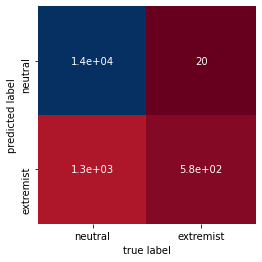

In [15]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

sns.heatmap(confusion_matrix(y_test, predictions), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [14]:
val = vectorizer.transform(['айма олар алла '])
naive_bayes.predict(val)

array([0], dtype=int64)

# GaussianNB

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train_cv.toarray(),y_train)
#predition
pred=classifier.predict(X_test_cv.toarray())
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred)))
print('Recall score: {}'.format(recall_score(y_test, pred)))
print('F1 score: {}'.format(f1_score(y_test, pred)))

sns.heatmap(confusion_matrix(y_test, pred), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

# RandomForestClassifier

In [ ]:
classifier1=RandomForestClassifier(n_estimators=100,criterion='entropy')
classifier1.fit(X_train_cv.toarray(),y_train)
predRF=classifier1.predict(X_test_cv.toarray())
print('Accuracy score: {}'.format(accuracy_score(y_test, predRF)))
print('Precision score: {}'.format(precision_score(y_test, predRF)))
print('Recall score: {}'.format(recall_score(y_test, predRF)))
print('F1 score: {}'.format(f1_score(y_test, predRF)))

sns.heatmap(confusion_matrix(y_test, predRF), square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['neutral', 'extremist'], yticklabels=['neutral', 'extremist'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
lasted = pd.DataFrame([['MultinomialNB', accuracy_score(y_test, predictions)*100], 
                       ['GaussianNB', accuracy_score(y_test, pred)*100], 
                       ['RandomForestClassifier', accuracy_score(y_test, predRF)*100]],
                     columns = ['Algorithm', 'Accuracy score'])
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Algorithm", y="Accuracy score", data=lasted)
g.set_xticklabels(g.get_xticklabels(), rotation=30)